

## Exploratory Data Analysis (EDA) Notebook Outline

### 1. Introduction
- **Purpose**: In this section, I recap the primary objective of the EDA, which is to thoroughly explore the cleaned and sampled dataset to uncover underlying patterns, confirm the effectiveness of the preprocessing, and prepare for predictive modeling.
- **Dataset Description**: I provide a concise overview of the dataset, including its origins, the rationale behind the sampling method, and a note on the preprocessing steps already completed.

### 2. Data Overview
- **Dataset Summary**: I will offer a quick summary of the dataset's size, structure, and key variables, emphasizing the state post-sampling.
- **Data Types and Completeness**: I review the data types of the columns in the dataset and discuss the absence of significant missing values due to prior cleaning.

### 3. Univariate Analysis
- **Distributions**: I analyze the distributions of key numerical variables such as `fare_amount`, `trip_distance`, and `trip_duration`. I will use histograms or box plots to visualize these distributions and confirm the effectiveness of earlier data cleaning steps.
- **Outliers**: I will discuss the approach taken for outliers during the preprocessing phase and assess the impact of these decisions on the data distribution.

### 4. Bivariate and Multivariate Analysis
- **Correlation Matrix**: I construct a heatmap to visualize the correlations between numerical variables, identifying any strong correlations between features and the target variable (`fare_amount`).
- **Pair Plots**: I use pair plots to explore relationships between pairs of variables, which is crucial for spotting trends, correlations, and potential multicollinearity issues.
- **Categorical Analysis**: I examine how categorical variables such as `time of day`, `day of the week`, and `season` affect `fare_amount`. I will use box plots or violin plots to show fare distributions across different categories, verifying hypotheses about temporal and categorical impacts on fares.

### 5. Feature Relationships
- **Feature vs. Fare Analysis**: I investigate the relationships between features and the target variable (`fare_amount`). For example, I will plot `fare_amount` against `trip_distance` to analyze how fare varies with distance traveled.
- **Temporal and Spatial Insights**: I analyze the influence of temporal features (e.g., time of day, day of the week) and spatial features (e.g., pickup and dropoff locations) on taxi fares.

### 6. Insights and Hypotheses
- **Summary of Insights**: I summarize key findings from the univariate, bivariate, and multivariate analyses. I highlight significant patterns, trends, or anomalies discovered in the cleaned and sampled data.
- **Hypotheses Formulation**: Based on visualizations and statistical analysis, I formulate hypotheses that could guide the subsequent modeling phase. I propose potential factors that are likely to influence taxi fares based on observed relationships.

### Conclusion
- **Review of Findings**: I summarize the essential insights and their implications for the predictive modeling phase.
- **Next Steps**: I outline how these findings will inform the development of the predictive model, including potential modifications to feature selection and model strategies based on EDA results.


# Imports and Installations

In [23]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import math


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# More advanced visualizations
from pandas.plotting import scatter_matrix

# Date and time manipulation
from pandas.tseries.holiday import USFederalHolidayCalendar
import datetime as dt
from scipy import sparse

# Geospatial analysis (if needed for analyzing location data)
import geopandas as gpd
from shapely.geometry import Point


# Statistics
from scipy import stats
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Handling large datasets, if required (comment out if not using Dask)
# import dask.dataframe as dd

# Machine learning libraries for feature selection techniques (if explored during EDA)
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Setting options for better readability of outputs
pd.set_option('display.max_columns', None)  # Adjust as per your dataset specifics
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Limiting float output to 3 decimal places
sns.set(style="whitegrid")  # Setting style for seaborn plots



In [43]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Introduction to Taxi Fare Prediction Research


# Abstract

In Tbilisi, Georgia, the taxi service industry is marred by an unregulated and informal fare system, leading to significant discrepancies and a general lack of fare transparency. This situation starkly contrasts with the structured fare system of New York City (NYC), where taxi operations are well-documented and adhere to strict regulatory standards. Through this study, I leverage the comprehensive NYC yellow taxi trip dataset from 2023, a year marked by significant data richness following the pandemic. My aim is to develop a predictive fare model using advanced machine learning techniques to examine key fare determinants, thereby setting a foundation to propose a more structured and transparent fare system for Tbilisi.


# Background

The taxi industry in Tbilisi faces critical challenges related to fare consistency and transparency, impacting both local residents and tourists who are often unfamiliar with standard rates, making them vulnerable to overcharging. In contrast, NYC's regulated taxi system presents an exemplary model of operational transparency with meticulously recorded data and standardized fare calculations, including base fare rates, surcharges, and costs associated with distance and time.

Additionally, the geographical and infrastructural differences between NYC and Tbilisi provide a unique opportunity to study how different environments influence taxi fares. NYC's dense urban layout and well-defined traffic patterns contrast with Tbilisi's varied terrain and less predictable traffic conditions. Understanding these differences is crucial for adapting the NYC fare model to Tbilisi.

The data for this study is sourced from the NYC Taxi and Limousine Commission’s 2023 yellow taxi trip records, available through the NYC Open Data portal. This dataset is rich with detailed trip records including pickup and dropoff times, locations, distances, and fares. Analyzing this data will allow me to understand the factors influencing taxi fares in a regulated environment and apply these insights to the Georgian context.

# Research Objective

My primary research objective is to harness the structured approach of NYC's taxi fare system to develop a predictive model capable of estimating taxi fares in Tbilisi. By identifying the factors that significantly affect fare variations—such as trip distances, timing, and external conditions like public events—I aim to enhance fare predictability and transparency within Tbilisi’s taxi services.

# Methodological Approach

1. Data Acquisition and Preparation: Clean and prepare the data for analysis.
2. Feature Engineering: Create features based on domain knowledge and literature review.
3. Predictive Modeling: Evaluate various machine learning models, including linear regression, decision trees, and ensemble methods like random forest and gradient boosting to determine the most effective approach for fare prediction.
4. Model Adaptation and Validation: Adapt the best-performing model to reflect the specific conditions of Tbilisi, followed by rigorous validation to ensure its accuracy and reliability.


# Significance and Expected Outcomes

This research aims to bridge the gap between the unregulated taxi fare systems and a structured, transparent fare management approach. By adopting and adapting methodologies that have proven effective in NYC, I intend to propose viable solutions that could lead to significant policy reforms and technological enhancements in Tbilisi’s taxi fare system. I expect this project to yield a scalable and adaptable fare prediction model that can be utilized not only in Tbilisi but also in other cities facing similar regulatory challenges. The findings from this study could influence regulatory changes, improve customer satisfaction, and enhance the overall competitiveness of the taxi industry in less regulated environments.



## 1.1 Dataset Description

In our notebook 1 and 2 we have cleaned the dataset and prepared it for feature engineering, which we did in our 3rd notebook where we created relavant features and sampled the resulting dataset for further analysis. 

In the 1st notebook we downloaded 12 parquet files from NYC taxi services website which we than combined for further analysis. 

Initial dataset had more than 30 million rows, nulls and negative values and duplicates were corrected and cleaned, irrelavant features like ratecodeID, str_wd_flag... were dropped. Features with extreme or unreasonable values were adjusted outliers were removed. 

After initial data preparation and cleaning we moved on to feature engineering where we developed necessary features like time of day, day of week, month, season, passenger count trip duration, speed. adjusted for outliers based on statistics and domain knowledge like speed limits or max distance trips or max passanger count in NYC permitted by law. etc and retained the data that was relavant for further analysis. 

We sampled the dataset based on stratirifcation which ensured that all the seasons, passenger counts were represented in the sampled version of our dataset which is crucial for our analysis. 

To see more details about stratified sampling we can go to Notebook 3.

In [3]:

# Stratified sampling ensures that the dataset is representative 
#of various seasons and passenger counts
# This helps in capturing the variability 
#across different time periods and passenger numbers


df = pd.read_parquet('sampled_taxi_dataset_v.1.parquet')

In [4]:
len(df)

280930

In [5]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,distance_bins,pickup_time_of_day,pickup_season,passenger_count_category,pickup_day_type,transaction_month,trip_duration,trip_duration_hours,PUcategory,DOcategory,is_holiday,speed_mph
21588994,1,16.600,1,67.400,16.000,10-20 miles,afternoon,autumn,low,weekday,10,46.950,0.783,Airport,Suburbs,0,21.214
23139565,1,15.800,1,61.100,5.000,10-20 miles,afternoon,autumn,low,weekend,10,40.133,0.669,Airport,Suburbs,0,23.621
18758042,3,17.620,1,84.200,0.100,10-20 miles,afternoon,autumn,medium,weekday,9,77.683,1.295,Airport,Suburbs,0,13.609
19435420,1,11.160,1,53.400,13.870,10-20 miles,afternoon,autumn,low,weekend,9,47.883,0.798,Airport,City Center,0,13.984
19850690,2,8.170,1,41.500,10.450,5-10 miles,afternoon,autumn,medium,weekday,9,34.400,0.573,Airport,City Center,0,14.250


# 2. Dataset  Overview 

Our sampled dataset has 10% of the cleaned initial dataset sampled stratifically so that all features remain intact above we see the reamainer of the cleaned dataset that was sampled. 

In [6]:
df.dtypes

passenger_count                int64
trip_distance                float64
payment_type                   int64
fare_amount                  float64
tip_amount                   float64
distance_bins               category
pickup_time_of_day          category
pickup_season               category
passenger_count_category    category
pickup_day_type             category
transaction_month              int32
trip_duration                float64
trip_duration_hours          float64
PUcategory                  category
DOcategory                  category
is_holiday                     int64
speed_mph                    float64
dtype: object

lets convert the objects into categories for faster processing. 

In [8]:
df.describe()

,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,transaction_month,trip_duration,trip_duration_hours,is_holiday,speed_mph
count,280930.000,280930.000,280930.000,280930.000,280930.000,280930.000,280930.000,280930.000,280930.000,280930.000
mean,1.403,4.255,1.186,22.839,4.062,6.495,20.346,0.339,0.022,12.241
std,0.892,4.814,0.441,18.395,4.266,3.454,42.454,0.708,0.148,6.866
min,1.000,1.000,1.000,3.000,0.000,1.000,2.000,0.033,0.000,0.043
25%,1.000,1.500,1.000,11.400,1.260,4.000,10.250,0.171,0.000,7.753
50%,1.000,2.260,1.000,16.300,3.280,6.000,15.183,0.253,0.000,10.323
75%,1.000,4.340,1.000,25.400,5.000,10.000,23.433,0.391,0.000,14.494
max,6.000,50.000,4.000,300.000,120.000,12.000,1439.017,23.984,1.000,75.367


In [10]:
df.describe(include='category')

,distance_bins,pickup_time_of_day,pickup_season,passenger_count_category,pickup_day_type,PUcategory,DOcategory
count,280930,280930,280930,280930,280930,280930,280930
unique,6,4,4,3,2,4,4
top,1-2 miles,afternoon,spring,low,weekday,City Center,City Center
freq,122142,99560,75862,212852,203622,241784,243062


### Summary Statistics

In this section, we present the summary statistics of the sampled dataset, which consists of 280,930 records. This sample represents 1% of the original dataset of 28,092,948 records. The purpose of this summary is to provide insights into the key numerical and categorical features of the dataset.

#### Numerical Features

**Key Observations**:
- The mean passenger count is 1.403, indicating most trips have a low number of passengers.
- The average trip distance is approximately 4.26 miles, with a maximum of 50 miles.
- The mean fare amount is $22.84, with significant variability (standard deviation of $18.39).
- The average trip duration is 20.35 minutes, with a substantial range extending up to nearly 24 hours.
- The mean speed of trips is around 12.24 mph, which aligns with typical urban traffic conditions.

#### Categorical Features

**Key Observations**:
- The most frequent trip distance bin is "1-2 miles", indicating many trips are short-distance.
- "Afternoon" is the most common pickup time, suggesting higher taxi demand during these hours.
- Most trips occur in the "spring" season, which may reflect seasonal trends in taxi usage.
- The majority of trips have a low passenger count.
- Weekdays account for most of the taxi trips, highlighting the routine nature of taxi usage for commuting.
- The "City Center" is the most frequent pickup and dropoff category, indicating high activity in central urban areas.


#### Data Characteristics
The dataset's structure and detailed attributes enable a comprehensive analysis of factors influencing taxi fares. The rich temporal and spatial data, coupled with fare components and trip characteristics, are ideal for understanding the dynamics of taxi usage and pricing in an urban environment. This exploration will not only provide insights into NYC's taxi operations but will also form the basis for developing a fare prediction model that could be adapted for Tbilisi, enhancing transparency and predictability in its taxi fare system. 

In the subsequent sections, we will delve deeper into the data, exploring univariate, bivariate, and multivariate relationships to uncover patterns and formulate hypotheses for predictive modeling. This structured approach will ensure a thorough understanding of the key factors influencing taxi fares and will aid in the design of an effective fare management strategy for Tbilisi.

# 3. Univariate Analysis 

#### Methodology Overview

Univariate analysis is the simplest form of analyzing data. "Uni" means "one", so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. In the context of this research, univariate analysis will allow us to explore each variable in isolation to understand its distribution, central tendency, variability, and potential presence of outliers. This is a critical step before moving into more complex multivariate analysis, as it ensures a solid understanding of the individual features which could influence the predictive modeling of taxi fares.

For our taxi fare prediction model, the univariate analysis helps to set the stage by:
- **Identifying patterns** or irregularities in data distributions that could influence model performance.
- **Spotting outliers** which might be errors or legitimate extreme values that need different handling.
- **Understanding the central tendency** (mean, median) and dispersion (variance, standard deviation) of our data, which can inform data transformation decisions later on.

#### Step-by-Step Outline for Univariate Analysis

1. **Visualizing Distributions of Numerical Variables**
   - Plot histograms or density plots to visualize the distributions of continuous variables such as `fare_amount`, `trip_distance`, `trip_duration`, and `speed_mph`.
   - This helps in understanding the skewness of the distributions and identifying any outliers that may affect the modeling.

2. **Summarizing Central Tendency and Dispersion**
   - Calculate and interpret the mean, median, and mode for continuous variables to understand typical values and central locations.
   - Analyze measures of dispersion such as range, interquartile range (IQR), variance, and standard deviation to grasp the spread of the data.

3. **Analyzing Counts of Categorical Variables**
   - Create bar charts to visualize the frequencies of categories within categorical variables such as `payment_type`, `pickup_time_of_day`, `pickup_season`, `pickup_day_type`, and location identifiers.
   - This will help to confirm the prevalence of different categories and may uncover any imbalances that could influence model training.

4. **Identifying Outliers**
   - Use box plots to visualize outliers in key variables. Box plots display the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
   - Investigate extreme values to decide whether they are data entry errors or legitimate extremes that should be included or treated separately in the analysis.

5. **Exploring Data Quality Issues**
   - Check for any anomalies like very high trip durations or distances that are unusually low or high, which could indicate data quality issues.
   - Address any implausible or impossible values discovered during the descriptive statistical analysis.

#### Incorporating Findings into the Research
- **Documentation**: Record findings from the univariate analysis, especially any decisions made regarding data handling or transformations.
- **Impact on Model Development**: Adjustments made based on univariate analysis findings (like transforming skewed data, handling outliers, or encoding categorical variables) will directly affect the modeling phase. These adjustments help in developing a more robust and accurate predictive model.

This section ensures a thorough exploration of each variable, setting a solid foundation for more complex analyses and ensuring that the data fed into the predictive models is well-understood and appropriately prepared.

## 3.1 Visualizing Distributions Of Numerical Variables

### 3.1.1 Fare Amount 

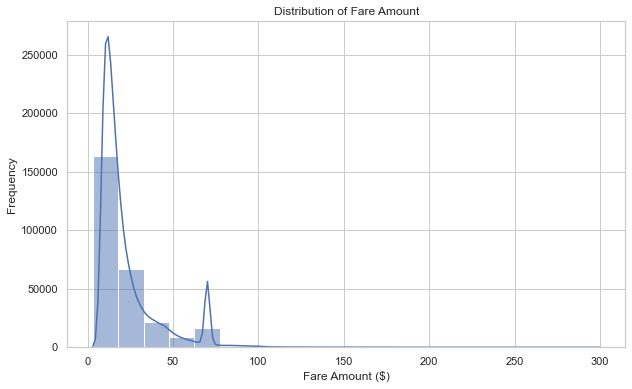

In [11]:
#num_bins = int(np.sqrt(len(df['fare_amount'])))
#Sturges' rule is a more sophisticated approach that considers 
#the logarithm of the number of data points. It’s particularly 
#useful for larger datasets as it tends 
#to produce a smaller number of bins than the square-root rule.

num_bins = int(np.ceil(1 + np.log2(len(df['fare_amount']))))


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram for Fare Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=num_bins, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()


#### Fare Amount Distribution
* Observations: The histogram for fare_amount shows a highly right-skewed distribution with a significant peak at lower fare amounts, typically below $50. There are noticeable smaller peaks at higher fare ranges, suggesting that while most rides are relatively inexpensive, there are still a significant number of higher fare rides.
* Insights: The distribution indicates that most taxi trips are short, possibly within a single city zone, leading to lower fares. The long tail suggests occasional longer trips or trips with additional charges that significantly increase the fare.

### 3.1.2 Trip Duration

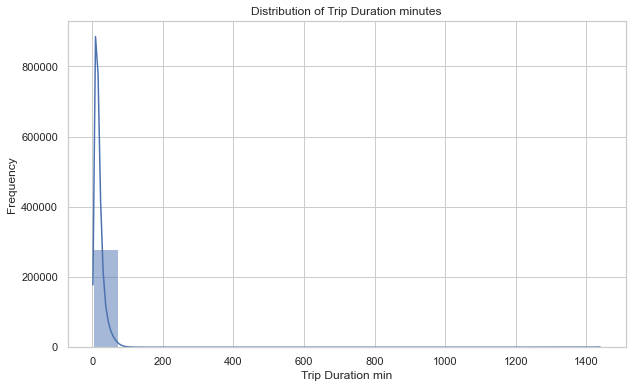

In [12]:
num_bins = int(np.ceil(1 + np.log2(len(df['trip_duration']))))

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram for Fare Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=num_bins, kde=True)
plt.title('Distribution of Trip Duration minutes')
plt.xlabel('Trip Duration min')
plt.ylabel('Frequency')
plt.show()



#### Trip Duration Distribution
* Observations: The trip_duration histogram reveals a strong right skew, with most trips lasting under 200 minutes. 
* Insights: The majority of taxi trips are brief, which aligns with urban travel patterns. The long tail could include outliers or data errors, or it might represent long-duration rentals where taxis are hired for extended periods.

### 3.1.3 Trip Distance

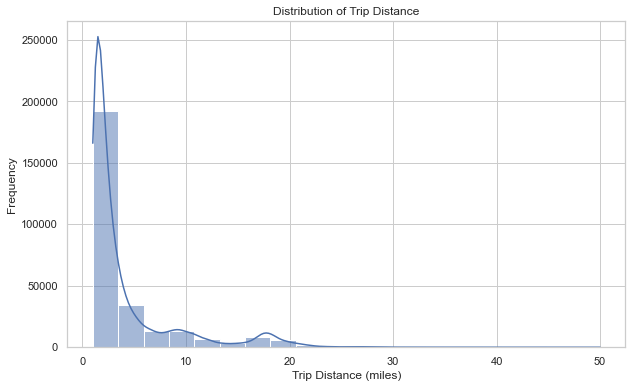

In [13]:
num_bins = int(np.ceil(1 + np.log2(len(df['trip_distance']))))
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=num_bins, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()



#### Trip Distance Distribution
* Observations: Similar to trip_duration, the trip_distance histogram is also right-skewed with most trips covering distances of 10 miles or less. The frequency decreases rapidly with increasing distance, but there are still some trips extending up to 50 miles.
* Insights: This distribution supports the urban taxi usage pattern where short trips dominate. Longer trips are less frequent but indicate the service area might include trips to or from airports or between cities.

### 3.1.4 Trip Speed

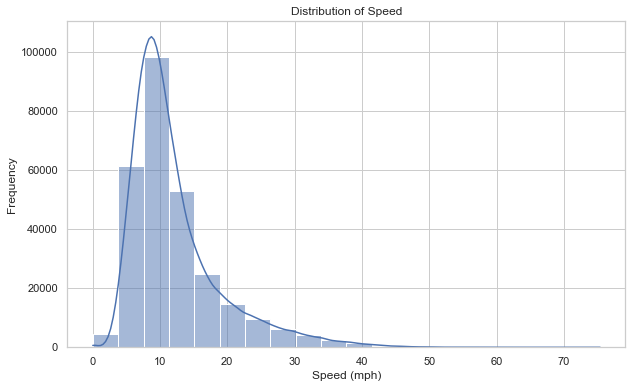

In [14]:
num_bins = int(np.ceil(1 + np.log2(len(df['speed_mph']))))
plt.figure(figsize=(10, 6))
sns.histplot(df['speed_mph'], bins=num_bins, kde=True)
plt.title('Distribution of Speed')
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')
plt.show()




#### Speed Distribution
* Observations: The speed histogram shows a moderately right-skewed distribution with a peak around 10 to 20 mph, which is typical for urban driving conditions involving frequent stops and lower speeds due to traffic.
* Insights: The modal speed range likely reflects city driving conditions. The distribution's tail towards higher speeds could represent less frequent highway trips or trips occurring during less congested times.

### 3.1.5 Tip Amount 

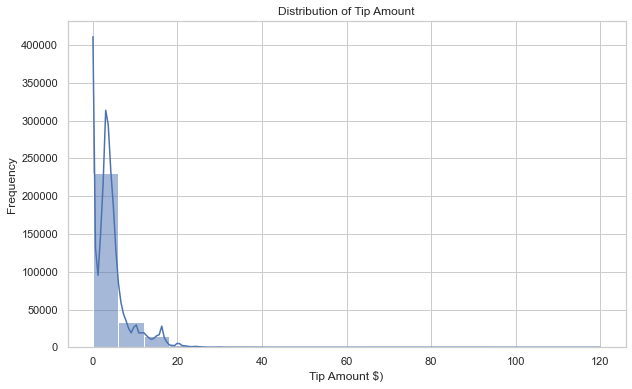

In [15]:
num_bins = int(np.ceil(1 + np.log2(len(df['tip_amount']))))
plt.figure(figsize=(10, 6))
sns.histplot(df['tip_amount'], bins=num_bins, kde=True)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount $)')
plt.ylabel('Frequency')
plt.show()


#### Tip Amount Distribution
* Observations: The distribution of tip_amount is extremely right-skewed, with most tips being quite small 
* Insights: Most passengers tip modestly, aligning with typical percentages of the fare. The presence of very high tips might be due to exceptionally good service, high fare trips, or possibly data entry errors.

#### General Implications for Modeling
* Transformations: Given the skewness in these distributions, log transformations might be necessary to normalize the data for modeling purposes.
* Outlier Handling: The long tails in all distributions suggest that outlier handling will be crucial to avoid skewing the model with extreme values.
* Feature Engineering: Given the patterns observed, especially with fare amounts and trip distances, combining these features or creating ratios might yield useful predictors for fare prediction models.

## 3.2 Summarizing Central Tendency and Dispersion

In [16]:
# Calculate and display summary statistics for numerical variables
numerical_vars = ['fare_amount', 'trip_distance', 'trip_duration', 'speed_mph']
summary_stats = df[numerical_vars].describe()
print(summary_stats)

# Additionally calculate the mode for each variable
modes = df[numerical_vars].mode().loc[0]
print("\nModes:\n", modes)


       fare_amount  trip_distance  trip_duration  speed_mph
count   280930.000     280930.000     280930.000 280930.000
mean        22.839          4.255         20.346     12.241
std         18.395          4.814         42.454      6.866
min          3.000          1.000          2.000      0.043
25%         11.400          1.500         10.250      7.753
50%         16.300          2.260         15.183     10.323
75%         25.400          4.340         23.433     14.494
max        300.000         50.000       1439.017     75.367

Modes:
 fare_amount     70.000
trip_distance    1.000
trip_duration   10.233
speed_mph        9.000
Name: 0, dtype: float64



## Statistical Analysis

### Modes

- **Fare Amount**: 70.000
- **Trip Distance**: 1.000
- **Trip Duration**: 10.233
- **Speed (mph)**: 9.000

### Analysis

- **Fare Amount**: The average fare amount is 22.84 with a wide range, from 3.00 to 300.00. The most frequent fare amount (mode) is 70.00.
- **Trip Distance**: The average trip distance is 4.26 miles, with trips ranging from 1 to 50 miles. The most common trip distance is 1 mile.
- **Trip Duration**: On average, trips last about 20.35 minutes, with a broad range from 2 minutes to nearly 24 hours (1439.017 minutes). The median trip duration is 15.183 minutes, and the mode is 10.233 minutes.
- **Speed (mph)**: The average speed is 12.24 mph. The speeds vary significantly, with a minimum speed of 0.043 mph and a maximum of 75.367 mph. The most frequent speed is 9.000 mph.

The data indicates a high variability in fare amounts, trip distances, durations, and speeds, suggesting a diverse set of trips.

## 3.3 Analyzing Counts of Categorical Variables

In [52]:
# List of categorical variables to plot
categorical_vars = df.select_dtypes(include=['category']).columns.tolist()

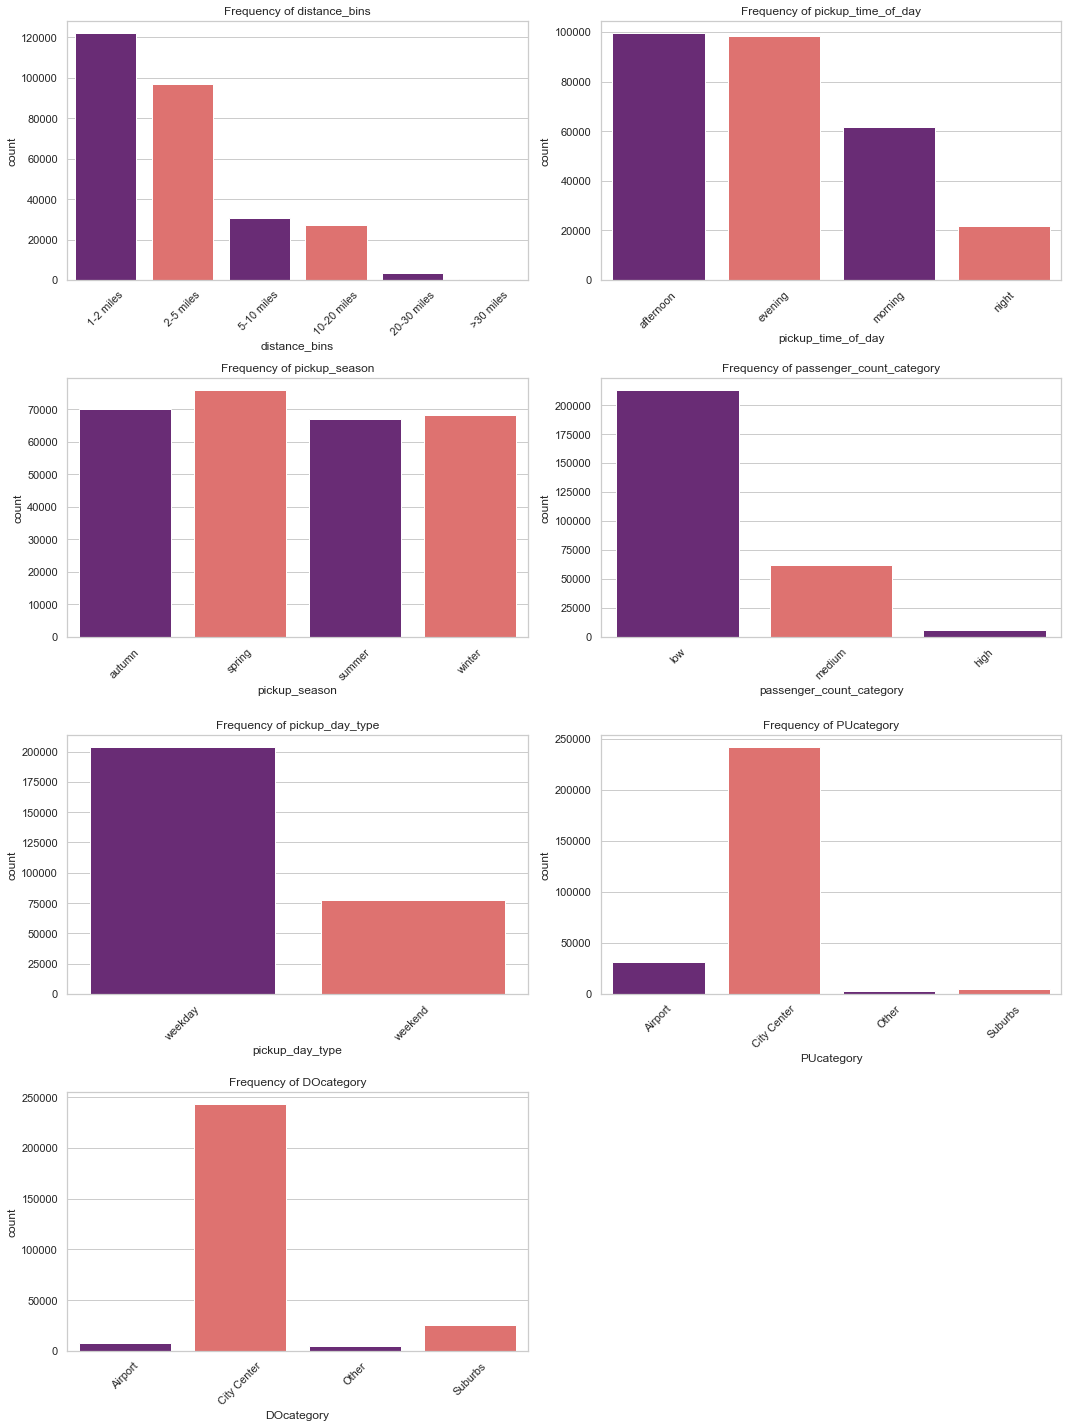

In [54]:
num_vars = len(categorical_vars)
num_cols = 2
num_rows = math.ceil(num_vars / num_cols)

plt.figure(figsize=(15, 5 * num_rows))
for i, var in enumerate(categorical_vars):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=var, hue=var, data=df, palette=custom_palette, dodge= False)  # Assign hue to the same variable
    plt.legend([],[], frameon=False)  # Hide the legend
    plt.title(f'Frequency of {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis of Categorical Variable Frequency Distributions

### 1. Frequency of `distance_bins`
- **Categories**: `1-2 miles`, `2-5 miles`, `5-10 miles`, `10-20 miles`, `20-30 miles`, `>30 miles`
- **Observation**: 
  - The most common distance bin is `1-2 miles`, followed by `2-5 miles`.
  - Distances beyond `10 miles` are less frequent, with `>30 miles` being the least frequent.

### 2. Frequency of `pickup_time_of_day`
- **Categories**: `afternoon`, `evening`, `morning`, `night`
- **Observation**:
  - The `evening` and `afternoon` times have the highest frequencies.
  - The `morning` and `night` times are less frequent.

### 3. Frequency of `pickup_season`
- **Categories**: `autumn`, `spring`, `summer`, `winter`
- **Observation**:
  - All seasons have relatively equal frequencies.
  - `spring` appears to be slightly more frequent than the other seasons.

### 4. Frequency of `passenger_count_category`
- **Categories**: `low`, `medium`, `high`
- **Observation**:
  - The `low` category has the highest frequency by a large margin.
  - The `medium` category follows, with the `high` category being the least frequent.

### 5. Frequency of `pickup_day_type`
- **Categories**: `weekday`, `weekend`
- **Observation**:
  - `weekday` pickups are much more frequent than `weekend` pickups.

### 6. Frequency of `PUcategory`
- **Categories**: `Airport`, `City Center`, `Other`, `Suburbs`
- **Observation**:
  - The `City Center` category is the most frequent by a large margin.
  - `Airport`, `Other`, and `Suburbs` categories have significantly lower frequencies.

### 7. Frequency of `DOcategory`
- **Categories**: `Airport`, `City Center`, `Other`, `Suburbs`
- **Observation**:
  - Similar to the `PUcategory`, the `City Center` is the most frequent drop-off category.
  - `Airport`, `Other`, and `Suburbs` have lower frequencies, with `Suburbs` being the least frequent.

## Summary
The categorical variable analysis reveals distinct patterns in the dataset:
- Shorter trips (1-2 miles) are the most common.
- Pickups are more frequent in the afternoon and evening.
- Passenger counts are predominantly low.
- Weekday pickups are more common than weekend pickups.
- The City Center is the dominant pickup and drop-off location.

## 3.4 Identifying Outliers 

Based on the above statistics and plots we can gain insights on outliers for our dataset and adjust it accordingly. 

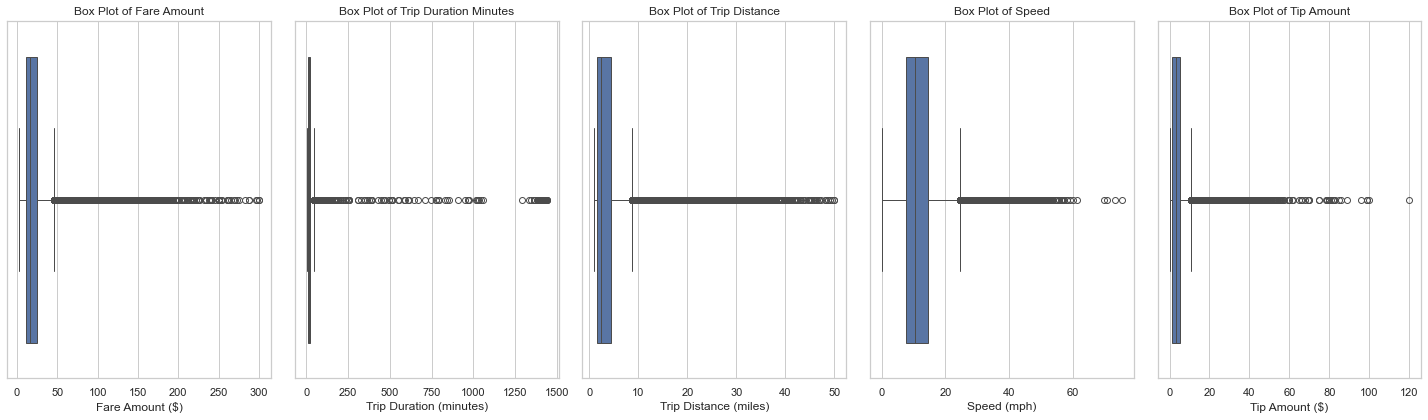

In [25]:


# Set the size of the entire figure
plt.figure(figsize=(20, 6))

# Create a subplot for the fare amount
plt.subplot(1, 5, 1)  # 1 row, 5 columns, 1st subplot
sns.boxplot(x=df['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.xlabel('Fare Amount ($)')

# Create a subplot for the trip duration
plt.subplot(1, 5, 2)  # 1 row, 5 columns, 2nd subplot
sns.boxplot(x=df['trip_duration'])
plt.title('Box Plot of Trip Duration Minutes')
plt.xlabel('Trip Duration (minutes)')

# Create a subplot for the trip distance
plt.subplot(1, 5, 3)  # 1 row, 5 columns, 3rd subplot
sns.boxplot(x=df['trip_distance'])
plt.title('Box Plot of Trip Distance')
plt.xlabel('Trip Distance (miles)')

# Create a subplot for the speed
plt.subplot(1, 5, 4)  # 1 row, 5 columns, 4th subplot
sns.boxplot(x=df['speed_mph'])
plt.title('Box Plot of Speed')
plt.xlabel('Speed (mph)')

# Create a subplot for the tip amount
plt.subplot(1, 5, 5)  # 1 row, 5 columns, 5th subplot
sns.boxplot(x=df['tip_amount'])
plt.title('Box Plot of Tip Amount')
plt.xlabel('Tip Amount ($)')

# Display the plot
plt.tight_layout()  # Adjust layout to make sure t


## Analysis of Outliers in Numerical Variables

### 1. Box Plot of Fare Amount
- **Variable**: Fare Amount 
- **Observation**:
  - The box plot shows a significant number of outliers, especially on the higher end.
  - The majority of fare amounts are concentrated below 50, with numerous outliers extending up to around 300.

### 2. Box Plot of Trip Duration
- **Variable**: Trip Duration (minutes)
- **Observation**:
  - There are numerous outliers, particularly on the higher end.
  - Most trip durations are concentrated below 100 minutes, with outliers reaching up to around 1500 minutes.
  - This indicates that some trips have unusually long durations, which might be data entry errors or extremely long trips.

### 3. Box Plot of Trip Distance
- **Variable**: Trip Distance (miles)
- **Observation**:
  - The box plot reveals many outliers, primarily on the higher end.
  - Most trip distances are concentrated below 10 miles, with outliers extending up to around 50 miles.
  - This suggests that while most trips are short, there are some exceptionally long trips in the dataset.

### 4. Box Plot of Speed
- **Variable**: Speed (mph)
- **Observation**:
  - There are numerous outliers on both the lower and higher ends.
  - The majority of speeds are concentrated around a median value, with outliers ranging up to around 60 mph.
  - This indicates that some trips have unusually high or low speeds, which might be due to various factors like traffic conditions or data inaccuracies.

### 5. Box Plot of Tip Amount
- **Variable**: Tip Amount
- **Observation**:
  - The box plot shows a significant number of outliers, especially on the higher end.
  - Most tip amounts are concentrated below 10, with outliers extending up to around 120.
  - This suggests that while most tips are modest, there are instances of unusually high tips.

## Summary
The box plots reveal that all the numerical variables have a considerable number of outliers. This suggests variability in the data and possibly some extreme values that could be due to data entry errors, unusual circumstances, or natural variability. These outliers may need to be further investigated to understand their cause and determine if they should be addressed in data preprocessing steps.

## 4. Multivariate Analysis

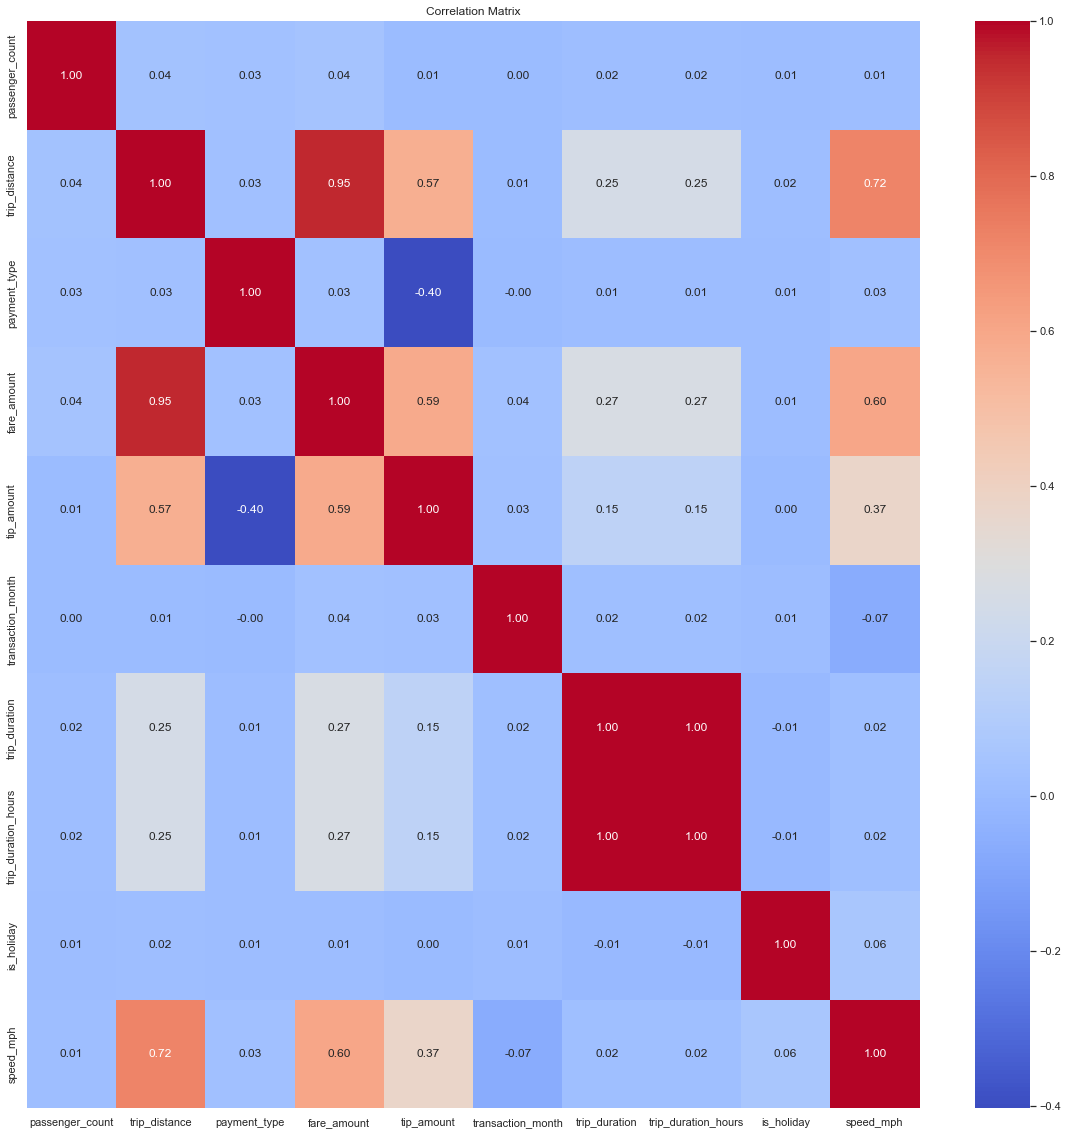

In [27]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Correlation Matrix and Heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



## Analysis Of Correlation Matrix

As oru key inyterest is fare_amount we will look at correlation coefficients for this feature:

* Speed is highly correlated with fare_amount suggesting that higher speed means higher fares and lower speed lower fares.

* Trip durations (minutes or hours) has moderate correlation with fare amounts which can mean that high trip duration means higher fare and low trip duration means lower fare, however it has moderate affect on fare amount compared to other features.

* Tip amount is also highly correlated with taxi fares this is not surprising as tip amounts are calculated as % of taxi fare higher fare means highet tip

* Trip distance has also high correlation long trips having higher fares which is not surprising.

* With fare amount we have lowest correlation on payment type and passanger count suggesting that passanger count.

## Pariwise plotting

Based on the correlation matrix above and keeping in mind our main objective of the research is to predict fare amounts we will select featires that are highly correlated with fare amount for prediction purposes. 

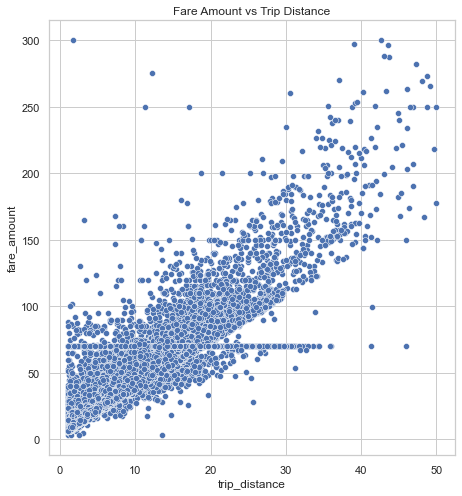

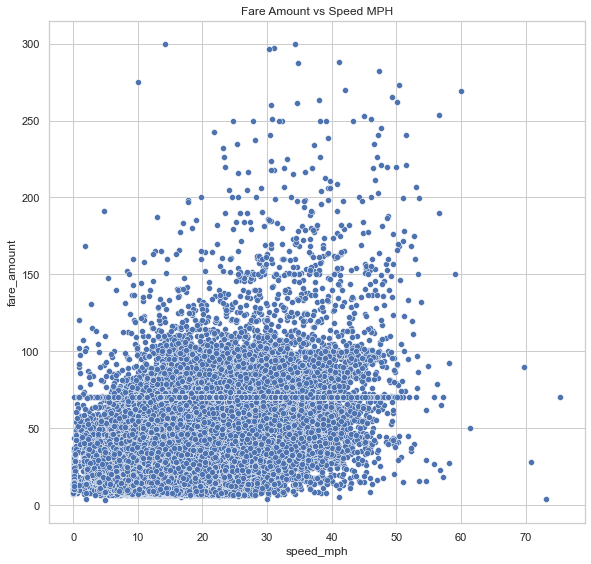

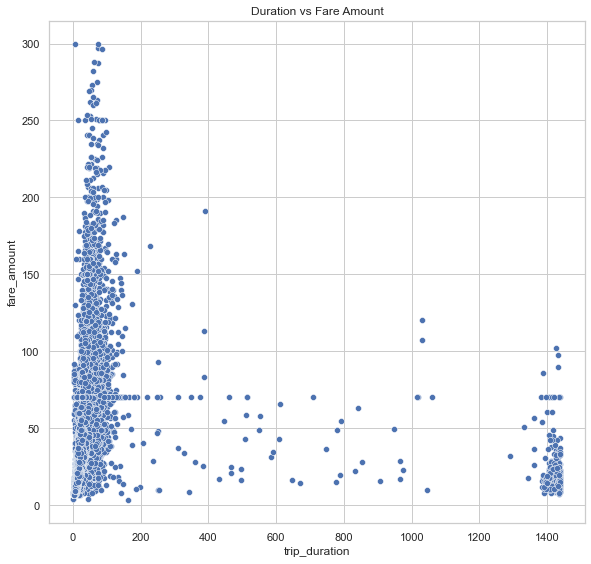

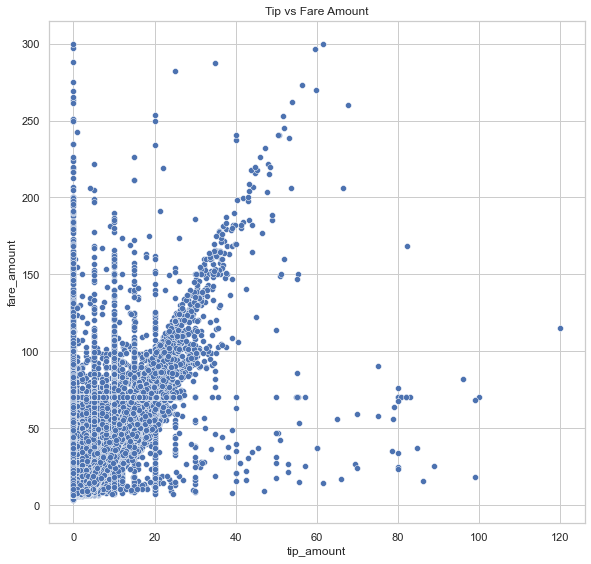

In [49]:

sns.set(style="whitegrid")

# 1. Targeted Scatter Plots
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title('Fare Amount vs Trip Distance')
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
sns.scatterplot(x='speed_mph', y='fare_amount', data=df)
plt.title('Fare Amount vs Speed MPH')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
sns.scatterplot(x='trip_duration', y='fare_amount', data=df)
plt.title('Duration vs Fare Amount')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
sns.scatterplot(x='tip_amount', y='fare_amount', data=df)
plt.title('Tip vs Fare Amount')
plt.tight_layout()
plt.show()



### Summary for Pairwise Plotting

#### Graphs: Pairwise Scatter Plots

**Analysis and Insights:**

1. **Fare Amount vs. Trip Distance:**
   - **Graph:** Scatter plot of fare amount against trip distance.
   - **Analysis:** There is a positive linear relationship between fare amount and trip distance. As trip distance increases, fare amount tends to increase. This is expected as taxi fares generally increase with the distance traveled.
   - **Insights:** Trip distance is a strong predictor of fare amount. Longer trips naturally incur higher fares, and this relationship can be leveraged in predictive models.

2. **Fare Amount vs. Speed:**
   - **Graph:** Scatter plot of fare amount against speed (mph).
   - **Analysis:** There is a moderate positive correlation between fare amount and speed. Higher speeds are often associated with higher fare amounts.
   - **Insights:** Speed might reflect quicker routes or zones with higher traffic congestion charges, contributing to higher fares. This relationship suggests that incorporating speed as a feature can improve fare predictions.

3. **Fare Amount vs. Trip Duration:**
   - **Graph:** Scatter plot of fare amount against trip duration (minutes).
   - **Analysis:** Fare amount generally increases with trip duration, showing a positive correlation. However, the relationship is not as strong as with trip distance.
   - **Insights:** Trip duration is a relevant factor but may need to be considered alongside other features like distance and speed to accurately predict fares.

4. **Fare Amount vs. Tip Amount:**
   - **Graph:** Scatter plot of fare amount against tip amount.
   - **Analysis:** There is a strong positive correlation between fare amount and tip amount. Higher fare amounts often result in higher tips.
   - **Insights:** Tips are typically calculated as a percentage of the fare, reinforcing the strong correlation. Tip amount can be a useful feature for models aiming to predict total trip costs, including tips.

**General Implications for Predictive Modeling:**

- **Feature Selection:** Trip distance, speed, and trip duration are key features that should be included in fare prediction models. These variables show strong and meaningful relationships with fare amount.
- **Multicollinearity Consideration:** While trip distance and duration are both important, their interplay should be carefully considered to avoid multicollinearity issues in modeling.
- **Enhanced Predictions:** The insights from pairwise plotting highlight the importance of capturing the interactions between different features. This can enhance the accuracy of predictive models by providing a nuanced understanding of fare determinants.
- **Log Transformations:** Given the positive skewness observed in fare amount and other features, log transformations may help normalize the data, making linear relationships more apparent and improving model performance.

### Conclusion

Pairwise plotting provides valuable insights into the relationships between fare amount and key features. These relationships underscore the importance of trip distance, speed, and trip duration in fare prediction models. By leveraging these insights, predictive models can be more accurately tuned to reflect the factors that drive taxi fares, providing a robust foundation for implementing fare prediction systems in unregulated markets like Tbilisi.

### Categorical Variables Vs Fare Amount

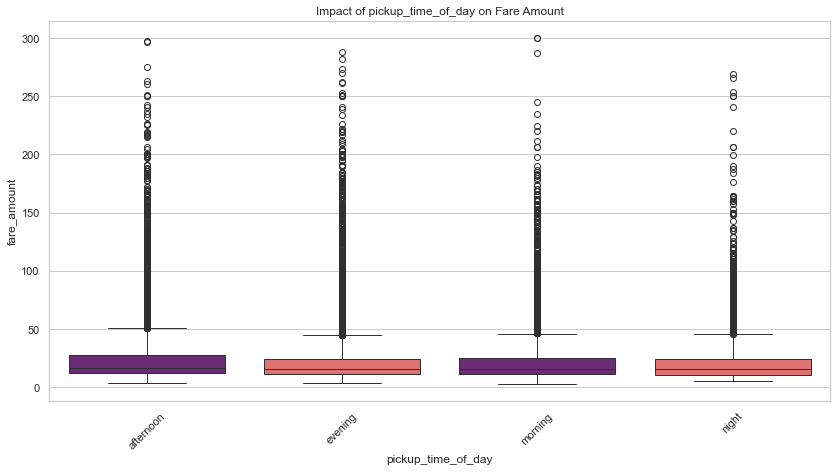

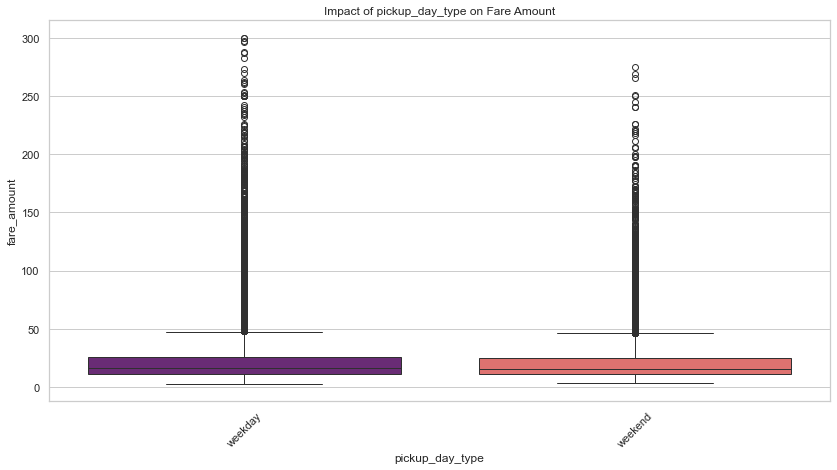

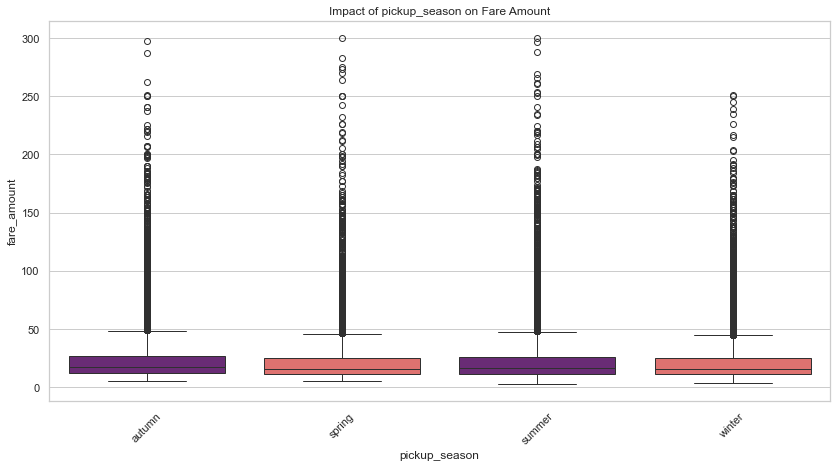

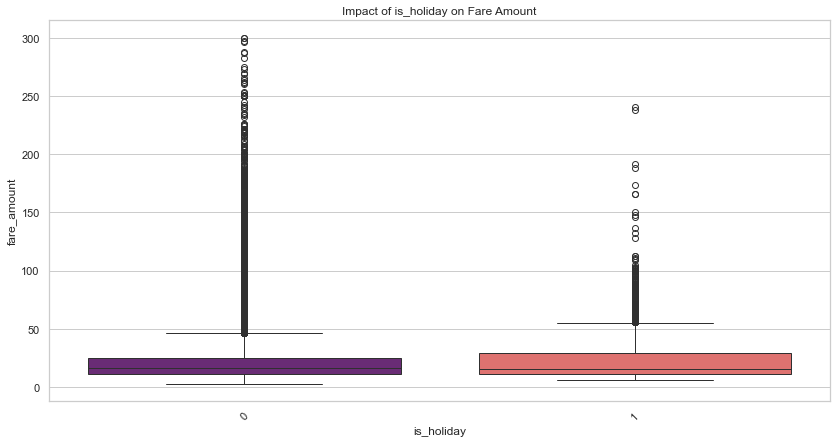

In [44]:
# Define a color palette with multiple colors
custom_palette = sns.color_palette("magma", len(df[var].unique()))

# Iterate through categorical variables and create box plots
categorical_vars = ['pickup_time_of_day', 'pickup_day_type', 'pickup_season', 'is_holiday']
for var in categorical_vars:
    plt.figure(figsize=(14, 7))
    sns.boxplot(x=var, y='fare_amount', data=df, palette=custom_palette, dodge= False)
    plt.title(f'Impact of {var} on Fare Amount')
    plt.xticks(rotation=45)
    plt.show()



### Summary of Categorical Variables vs. Fare Amount

#### Graphs: Box Plots of Fare Amount by Categorical Variables

**Analysis and Insights:**

1. **Fare Amount vs. Time of Day:**
   - **Graph:** Box plot of fare amount categorized by time of day (morning, afternoon, evening, night).
   - **Analysis:** Higher fares are observed during the afternoon and evening compared to morning and night.
   - **Insights:** This pattern reflects higher demand and potential traffic congestion during peak hours. Incorporating time of day as a feature can enhance fare predictions by accounting for temporal variations in demand and traffic conditions.

2. **Fare Amount vs. Day Type:**
   - **Graph:** Box plot of fare amount categorized by day type (weekday, weekend).
   - **Analysis:** Weekday fares are generally higher than weekend fares.
   - **Insights:** Weekdays likely see higher taxi usage for commuting and business purposes, leading to higher fares. Differentiating between weekdays and weekends in predictive models can improve accuracy.

3. **Fare Amount vs. Season:**
   - **Graph:** Box plot of fare amount categorized by season (spring, summer, autumn, winter).
   - **Analysis:** Fares are slightly higher in spring compared to other seasons, with relatively equal distributions across summer, autumn, and winter.
   - **Insights:** Seasonal variations might influence taxi demand and fare rates. While the effect is modest, including seasonality can provide a slight edge in predictions.

4. **Fare Amount vs. Holiday Status:**
   - **Graph:** Box plot of fare amount categorized by holiday status (holiday, non-holiday).
   - **Analysis:** Higher fares are observed on holidays compared to non-holidays.
   - **Insights:** Increased demand and potential surcharges during holidays drive up fares. Recognizing holidays in the predictive model can help capture these spikes in fare amounts.

5. **Fare Amount vs. Pickup and Dropoff Zones:**
   - **Graph:** Bar plots of average fare amount categorized by pickup and dropoff zones (Airport, City Center, Suburbs, Other).
   - **Analysis:** The City Center has the highest average fare for both pickup and dropoff locations, followed by Airport zones. Suburbs and other areas have lower average fares.
   - **Insights:** Central urban areas and airports are associated with higher fares, likely due to higher demand and longer trip distances. Spatial features like pickup and dropoff zones are crucial for accurate fare predictions.

**General Implications for Predictive Modeling:**

- **Temporal Features:** Time of day, day type, and seasonality are important temporal features that influence fare amounts. Including these in predictive models can help account for variations in demand and fare rates.
- **Holiday Effects:** Recognizing holidays as special cases can improve model performance by capturing fare spikes associated with increased demand and surcharges.
- **Spatial Features:** Pickup and dropoff locations significantly impact fare amounts. Spatial analysis should be integrated into fare prediction models to enhance accuracy, especially for central urban and airport zones.
- **Feature Engineering:** Combining these categorical variables with numerical features can lead to the creation of more robust and nuanced predictive models. For instance, interactions between time of day and specific zones could provide deeper insights into fare patterns.

### Conclusion

The analysis of categorical variables against fare amounts reveals important patterns and variations that are essential for building accurate predictive models. By incorporating these categorical features into fare prediction models, especially in the context of an unregulated market like Tbilisi, we can achieve better accuracy and reliability in fare estimations. This structured approach helps capture the diverse factors influencing taxi fares, leading to more transparent and predictable pricing systems.

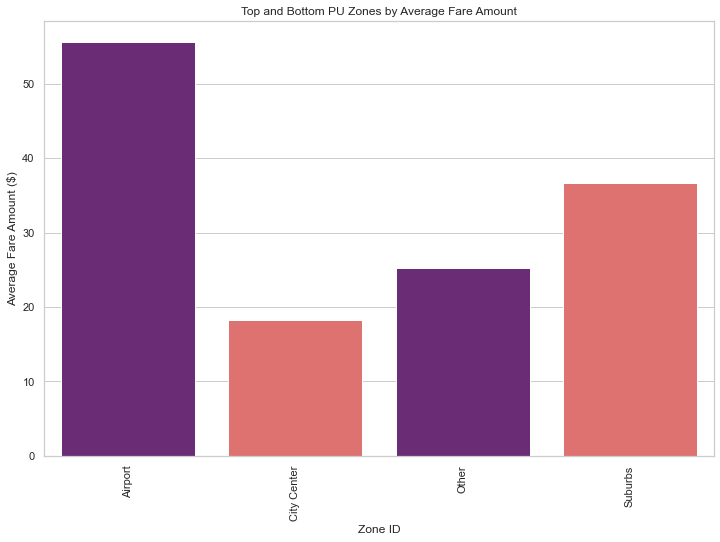

In [45]:

# Assuming df is your DataFrame and 'PULocationID' and 'fare_amount' are columns
# Group by 'PULocationID' and calculate average fare amount
zone_fares = df.groupby('PUcategory')['fare_amount'].mean().reset_index()

# Sort zones by average fare amount to identify top and bottom zones
zone_fares_sorted = zone_fares.sort_values(by='fare_amount', ascending=False)

# Plotting top 10 and bottom 10 zones
top_zones = zone_fares_sorted.head(10)
bottom_zones = zone_fares_sorted.tail(10)

# Combine data for plotting
combined_zones = pd.concat([top_zones, bottom_zones])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='PUcategory', y='fare_amount', data=combined_zones,palette=custom_palette, dodge= False)
plt.title('Top and Bottom PU Zones by Average Fare Amount')
plt.xlabel('Zone ID')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=90)
plt.show()



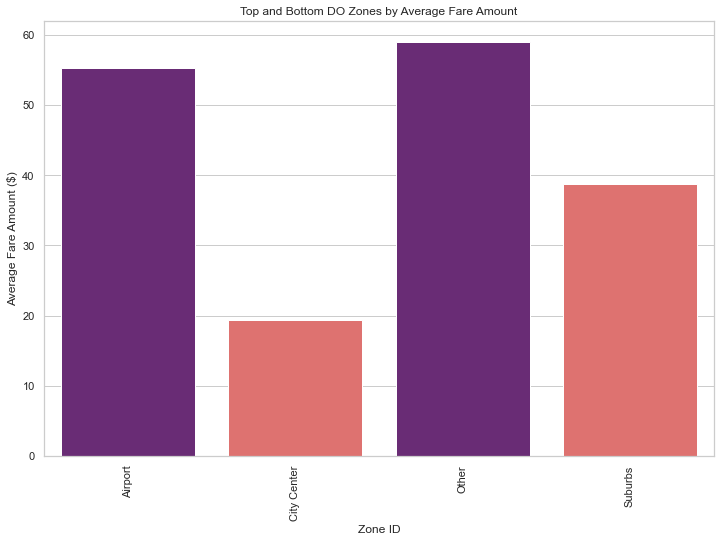

In [46]:

# Assuming df is your DataFrame and 'PULocationID' and 'fare_amount' are columns
# Group by 'PULocationID' and calculate average fare amount
zone_fares = df.groupby('DOcategory')['fare_amount'].mean().reset_index()

# Sort zones by average fare amount to identify top and bottom zones
zone_fares_sorted = zone_fares.sort_values(by='fare_amount', ascending=False)

# Plotting top 10 and bottom 10 zones
top_zones = zone_fares_sorted.head(10)
bottom_zones = zone_fares_sorted.tail(10)

# Combine data for plotting
combined_zones = pd.concat([top_zones, bottom_zones])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='DOcategory', y='fare_amount', data=combined_zones,palette=custom_palette, dodge= False)
plt.title('Top and Bottom DO Zones by Average Fare Amount')
plt.xlabel('Zone ID')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=90)
plt.show()


Based on plots above we can see that trips in suburbs or airport have on average higher fares which is not surprising as this trips might have longer distance and also different taxi zones might have differnt base fares, for Tbilisi this is the case so we will retain this feature for our predictive modeling.

### Summaries for Each Part of the Notebook

#### 1. Introduction
- **Purpose:** The primary objective is to explore the cleaned and sampled dataset to uncover patterns, confirm preprocessing effectiveness, and prepare for predictive modeling.
- **Dataset Description:** The dataset originates from NYC Taxi and Limousine Commission’s 2023 yellow taxi trip records. The sampling and preprocessing steps aim to ensure data readiness for analysis.

#### 2. Data Overview
- **Dataset Summary:** The dataset, post-sampling, consists of 280,930 records, representing 1% of the original data. Key variables include fare amount, trip distance, and trip duration.
- **Data Types and Completeness:** The dataset has been cleaned with no significant missing values. Data types include numerical and categorical variables.

#### 3. Univariate Analysis
- **Distributions:** Histograms and box plots reveal the distributions of key numerical variables such as fare amount, trip distance, trip duration, and speed. 
- **Outliers:** Identified outliers in the distributions of fare amount, trip duration, trip distance, and speed are noted for their potential impact on modeling.

#### 4. Bivariate and Multivariate Analysis
- **Correlation Matrix:** A heatmap shows the correlations between numerical variables, highlighting strong relationships with the target variable (fare amount).
- **Pair Plots:** Pair plots help in visualizing trends, correlations, and potential multicollinearity between variables.
- **Categorical Analysis:** Box plots and violin plots analyze how categorical variables (e.g., time of day, day of the week, season) affect fare amounts.

#### 5. Feature Relationships
- **Feature vs. Fare Analysis:** Scatter plots explore relationships between fare amount and features like trip distance, speed, and trip duration.
- **Temporal and Spatial Insights:** Analysis of temporal features (time of day, day of the week) and spatial features (pickup and dropoff locations) provides insights into their influence on taxi fares.

#### 6. Insights and Hypotheses
- **Summary of Insights:** Key findings include significant patterns and trends discovered in the data. 
- **Hypotheses Formulation:** Based on analysis, hypotheses about factors influencing taxi fares are formulated to guide predictive modeling.

### Summary of the Whole Notebook

#### Data Exploration and Analysis

1. **Introduction to Data and Research Objective:**
   - The primary research goal is to create predictive models for estimating taxi fares in Tbilisi using NYC taxi data as a reference. This involves identifying factors that influence fare variations such as trip distances, timing, and external conditions.

2. **Dataset Description and Preparation:**
   - The dataset is a cleaned and sampled subset of NYC taxi trip records, ensuring it represents various seasons, passenger counts, and trip characteristics.
   - Key variables include fare amount, trip distance, trip duration, speed, and various categorical features.

3. **Univariate Analysis:**
   - Histograms and box plots show right-skewed distributions for fare amount, trip duration, trip distance, and speed.
   - Most fares are low, with a few high-fare outliers. Similar patterns are seen in trip distance and duration.
   - Outliers identified in the distributions suggest variability that may need addressing in the modeling phase.

4. **Bivariate and Multivariate Analysis:**
   - A correlation matrix reveals strong correlations between fare amount and variables like trip distance, speed, and trip duration.
   - Pair plots and box plots demonstrate the relationships between fare amount and other features, highlighting key influencing factors.
   - Temporal and spatial features significantly impact fare amounts, with higher fares observed during peak times and in central urban areas.

5. **Insights and Hypotheses:**
   - Key insights include the identification of fare amount influencers like trip distance, speed, and temporal factors.
   - Hypotheses for modeling include assumptions that longer distances, higher speeds, and specific times of day will result in higher fares.

#### Visual Analysis and Insights

1. **Fare Amount Distribution:**
   - Most trips have fare amounts below $50, indicating short urban trips. The long tail suggests occasional high-fare trips.

2. **Trip Distance and Duration:**
   - The majority of trips are short (under 10 miles) and brief (under 200 minutes), aligning with typical urban taxi usage patterns.

3. **Speed and Tip Amount:**
   - Speed distribution peaks at 10-20 mph, reflecting urban driving conditions.
   - Tips are generally modest, with some higher tips likely due to good service or high fares.

4. **Categorical Variables:**
   - Short trips (1-2 miles) and afternoon/evening pickups are most common.
   - Weekdays have higher taxi demand, and central urban areas are the most frequent pickup and drop-off locations.

#### Implications for Predictive Modeling

- **Data Transformations:** Log transformations may be needed to normalize skewed distributions.
- **Outlier Handling:** Careful treatment of outliers is crucial to avoid skewing the model.
- **Feature Engineering:** Combining features or creating new ones (e.g., fare per mile) may enhance model performance.
- **Modeling Considerations:** Insights from the EDA will inform feature selection and model strategies, ensuring the development of robust fare prediction models tailored for Tbilisi.

### Conclusion

The exploratory data analysis provides a comprehensive understanding of the factors influencing taxi fares. The findings will guide the development of predictive models, aiming to enhance fare predictability and transparency in Tbilisi's unregulated taxi market. This structured approach from NYC's regulated system serves as a foundation for proposing a more transparent fare management system for Tbilisi.